In [2]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, List

In [3]:
# state schema
class AgentState(TypedDict):
    num_one:int
    num_two:int
    operation: str
    result:int

In [4]:
def adder(state:AgentState)->AgentState:
    """Add the two numbers"""
    state["result"] = state["num_one"] + state["num_two"]
    return state

def subtract(state:AgentState)-> AgentState:
    """subtract two numbers"""
    state["result"] = state["num_one"] - state["num_two"]
    return state

In [5]:
# conditional node
def router(state:AgentState)-> AgentState:
    """Conditional router"""
    if state["operation"] == "+":
        return "go_to_add"
    if state["operation"] == "-":
        return "go_to_sub"

In [7]:
from langgraph.graph import StateGraph, START, END

graph = StateGraph(AgentState)
graph.add_node("adder", adder)
graph.add_node("subtract", subtract)
graph.add_node("router", lambda state: state)

graph.add_edge(START, "router")
graph.add_conditional_edges("router", router, {"go_to_add" : "adder", "go_to_sub": "subtract"})
graph.add_edge("adder", END)
graph.add_edge("subtract", END)

app = graph.compile()



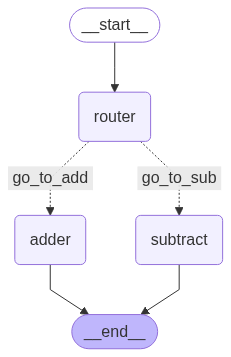

In [8]:
from IPython.display import display , Image

display(Image(app.get_graph().draw_mermaid_png()))

In [12]:
app.invoke({"num_one": 10, "num_two": 7, "operation": "-"})

{'num_one': 10, 'num_two': 7, 'operation': '-', 'result': 3}

In [65]:
# Exercise
class AgentState(TypedDict):
    num_one:int
    num_two:int
    num_three:int
    num_four:int
    oper_one:str
    oper_two:str
    final_one:int
    final_two:int

In [89]:
def add_node(state:AgentState)->AgentState:
    """Add the two numbers"""
    state["final_one"] = state["num_one"] + state["num_two"]
    return state

def sub_node(state:AgentState)->AgentState:
    """Subtract the node"""
    state["final_one"] = state["num_one"] - state["num_two"]
    return state
    
def add_node2(state:AgentState)->AgentState:
    """Add the two numbers"""
    state["final_two"] = state["num_three"] + state["num_four"]
    return state

def sub_node2(state:AgentState)->AgentState:
    """Subtract the node"""
    state["final_two"] = state["num_three"] - state["num_four"]
    return state

def router(state:AgentState)->AgentState:
    if state["oper_one"] == "+":
        return "addition_operation"
    if state["oper_one"] == "-":
        return "subtraction_operation"
    
def router2(state:AgentState)->AgentState:
    print("herr ..",  state)

    if state["oper_two"] == "+":
        return "addition_operation2"
    if state["oper_two"] == "-":
        return "subtraction_operation2"
    
    

In [90]:
from langgraph.graph import START, END, StateGraph

graph = StateGraph(AgentState)

graph.add_node("add_node", add_node)
graph.add_node("sub_node", sub_node)

graph.add_node("add_node2", add_node2)
graph.add_node("sub_node2", sub_node2)

graph.add_node("router", lambda state:state)
graph.add_node("router2", lambda state: state)

graph.add_edge(START, "router")

graph.add_conditional_edges("router", router, {"addition_operation": "add_node", "subtraction_operation": "sub_node" })

graph.add_conditional_edges("router2", router2,  {"addition_operation2": "add_node2", "subtraction_operation2": "sub_node2" })



graph.add_edge("add_node", "router2")
graph.add_edge("sub_node", "router2")

app = graph.compile()

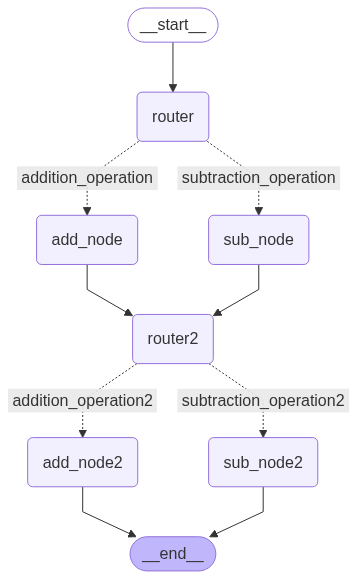

In [91]:
from IPython.display import display, Image

display(Image(app.get_graph().draw_mermaid_png()))

In [92]:

app.invoke({"num_one": 10, "oper_one":"-", "num_two": 5, "num_three": 7, "oper_two": "+", "num_four": 2, "final_one": 0, "final_two": 0})

herr .. {'num_one': 10, 'num_two': 5, 'num_three': 7, 'num_four': 2, 'oper_one': '-', 'oper_two': '+', 'final_one': 5, 'final_two': 0}


{'num_one': 10,
 'num_two': 5,
 'num_three': 7,
 'num_four': 2,
 'oper_one': '-',
 'oper_two': '+',
 'final_one': 5,
 'final_two': 9}